In [39]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import os
from datetime import datetime as ddt
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline


path = '2_5raw.csv'


rawDF = pd.read_csv(path)
#df['Date'] = df['Date'].apply(lambda x: int(str(x)[-4:]))

rawDF['Date'] = [ddt.strptime(rawDF['Date'][i], "%m/%d/%Y") for i in xrange(len(rawDF['Date']))]
print [rawDF[:4]]


[        Date  AQS_SITE_ID  POC  Daily Mean PM2.5 Concentration     UNITS  \
0 2016-01-01     60530002    3                             7.9  ug/m3 LC   
1 2016-01-02     60530002    3                             7.2  ug/m3 LC   
2 2016-01-03     60530002    3                             9.5  ug/m3 LC   
3 2016-01-04     60530002    3                             4.6  ug/m3 LC   

   DAILY_AQI_VALUE  DAILY_OBS_COUNT  PERCENT_COMPLETE  AQS_PARAMETER_CODE  \
0               33                1             100.0               88101   
1               30                1             100.0               88101   
2               40                1             100.0               88101   
3               19                1             100.0               88101   

         AQS_PARAMETER_DESC  CBSA_CODE    CBSA_NAME  STATE_CODE       STATE  \
0  PM2.5 - Local Conditions      41500  Salinas, CA           6  California   
1  PM2.5 - Local Conditions      41500  Salinas, CA           6  Californi

In [40]:
#可是第一個date和台灣用法不同，所以要轉
dateList = sorted(list(set(rawDF['Date']))) #所有觀測日期都是unique的
siteList = sorted(list(set(rawDF['AQS_SITE_ID']))) #這個用不同的觀測站來分

print (siteList)

[60530002, 60530008, 60531003]


## 做出三個觀測站的 PM2.5 vs. Time

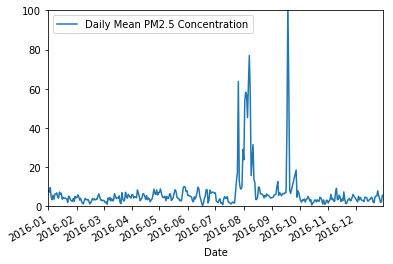

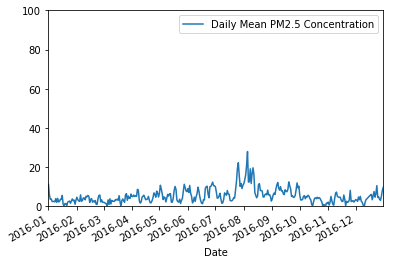

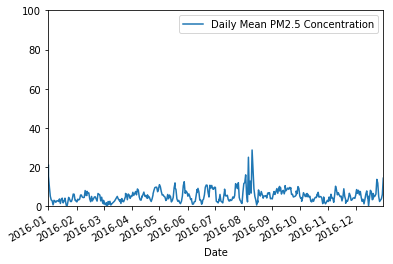

In [44]:
site0 = rawDF[rawDF['AQS_SITE_ID'] == siteList[0]]
site1 = rawDF[rawDF['AQS_SITE_ID'] == siteList[1]]
site2 = rawDF[rawDF['AQS_SITE_ID'] == siteList[2]]
#print (site0[:5])

#ts = pd.Series(site0['Daily Mean PM2.5 Concentration'], index=site0['Date'])

#print(site0['Daily Mean PM2.5 Concentration'])

site0.plot(x='Date', y='Daily Mean PM2.5 Concentration', ylim = (0,100))
site1.plot(x='Date', y='Daily Mean PM2.5 Concentration', ylim = (0,100))
site2.plot(x='Date', y='Daily Mean PM2.5 Concentration', ylim = (0,100))

#ts = ts.cumsum()
#ts.plot()
#print ts[:5]

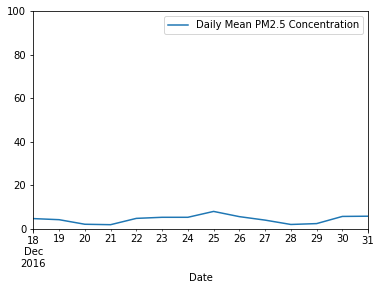

In [46]:
site0[-14:].plot(x='Date', y='Daily Mean PM2.5 Concentration', ylim = (0,100))

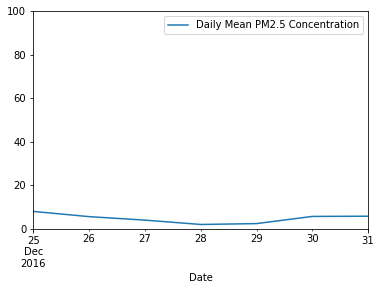

In [47]:
site0[-7:].plot(x='Date', y='Daily Mean PM2.5 Concentration', ylim = (0,100))

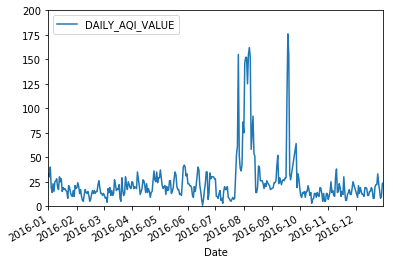

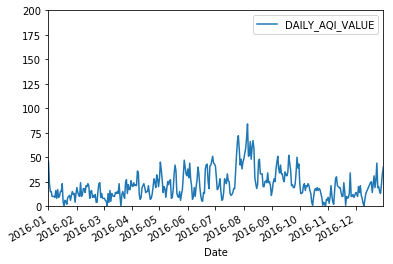

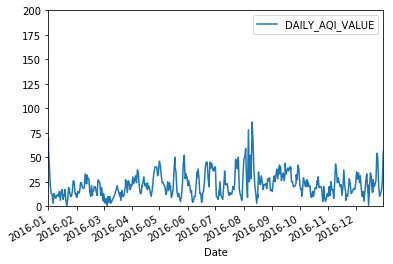

In [57]:
site0.plot(x='Date', y='DAILY_AQI_VALUE', ylim = (0,200))
site1.plot(x='Date', y='DAILY_AQI_VALUE', ylim = (0,200))
site2.plot(x='Date', y='DAILY_AQI_VALUE', ylim = (0,200))

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

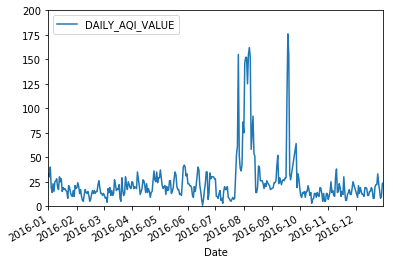

In [56]:
a = site0.plot(x='Date', y='DAILY_AQI_VALUE', ylim = (0,200))
a.savefig('a.png')